In [132]:
%%time
from datetime import datetime
a = datetime.now()

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_palette("afmhot")
# sns.set_palette("twilight")
# sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":1.5})
sns.set_style("whitegrid")
import pylab
pylab.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')


CPU times: total: 0 ns
Wall time: 1.99 ms


In [133]:
%%time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Input, Activation
import tensorflow.keras as tfk

CPU times: total: 0 ns
Wall time: 0 ns


In [134]:
import sklearn.datasets
cancer=sklearn.datasets.load_breast_cancer()

In [135]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [136]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
y = cancer['target']

df['classification'] = y
df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,classification
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


In [137]:
# 212 - Malignant ~ 0
# 357 - Benign ~ 1

In [138]:
df['classification']= df['classification'].apply(lambda x : 1 if x==0 else 0)

<AxesSubplot:xlabel='classification', ylabel='count'>

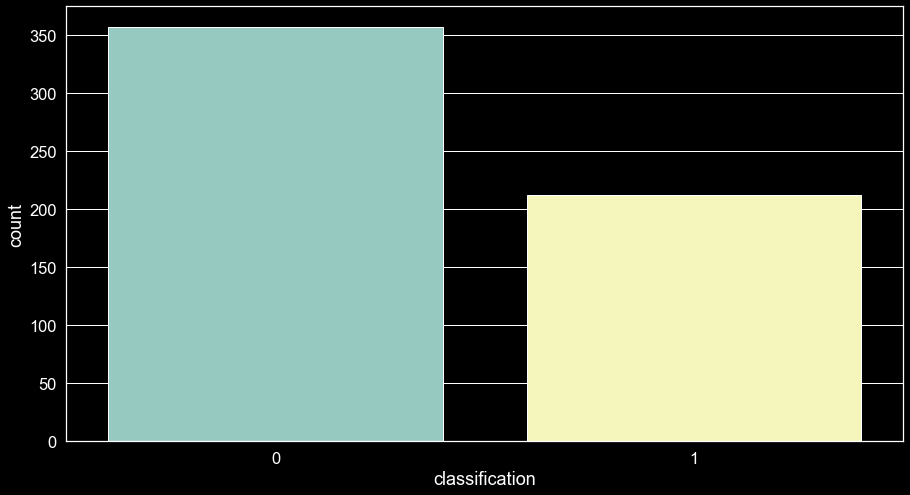

In [139]:
sns.countplot(data=df, x=df['classification'])

In [140]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()

In [141]:
target='classification'
y=df[target].values
# X = df.loc[df.columns != target]
X = df.loc[:,df.columns != target].values


In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=415)

In [181]:
pd.DataFrame(y_train).value_counts()

0    269
1    157
dtype: int64

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=415,stratify=y)
pd.DataFrame(y_train).value_counts()

0    267
1    159
dtype: int64

In [169]:
y_test.sum()

53

In [143]:
len(X_train), len(y_test)

(426, 143)

In [144]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [145]:
model = Sequential()

In [146]:
model.add(Dense(128, input_dim=30, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [147]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [148]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               3968      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________
None


In [149]:
%%time
history=model.fit(X_train,y_train, epochs=700,validation_data=(X_test,y_test),verbose=0,batch_size=2400)

CPU times: total: 25.8 s
Wall time: 22.1 s


In [150]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.689743,0.624413,0.683376,0.615385
1,0.680948,0.631455,0.675013,0.713287
2,0.672940,0.725352,0.667704,0.825175
3,0.665839,0.807512,0.660370,0.797203
4,0.658644,0.856808,0.652988,0.797203
...,...,...,...,...
695,0.000248,1.000000,0.584687,0.930070
696,0.000247,1.000000,0.585135,0.930070
697,0.000246,1.000000,0.585554,0.930070
698,0.000245,1.000000,0.585881,0.930070


In [151]:
hist = model.history.history

In [152]:
pd.DataFrame(hist)

,loss,accuracy,val_loss,val_accuracy
0,0.689743,0.624413,0.683376,0.615385
1,0.680948,0.631455,0.675013,0.713287
2,0.672940,0.725352,0.667704,0.825175
3,0.665839,0.807512,0.660370,0.797203
4,0.658644,0.856808,0.652988,0.797203
...,...,...,...,...
695,0.000248,1.000000,0.584687,0.930070
696,0.000247,1.000000,0.585135,0.930070
697,0.000246,1.000000,0.585554,0.930070
698,0.000245,1.000000,0.585881,0.930070


In [153]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.9301


[0.5862101912498474, 0.9300699234008789]

<AxesSubplot:>

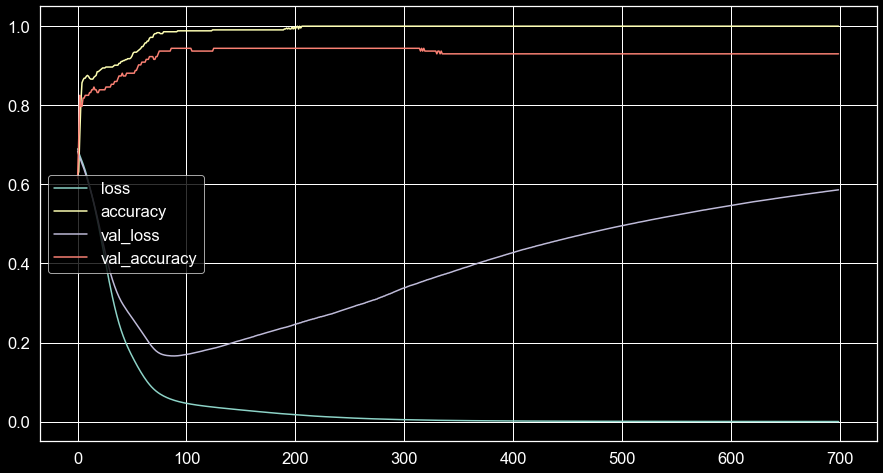

In [154]:
pd.DataFrame(hist).plot()

<AxesSubplot:>

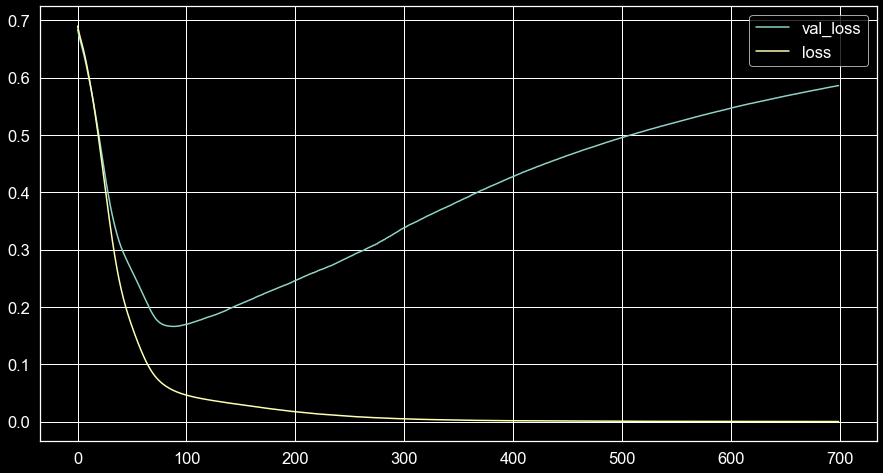

In [155]:
pd.DataFrame(hist)[['val_loss','loss']].plot()

<AxesSubplot:>

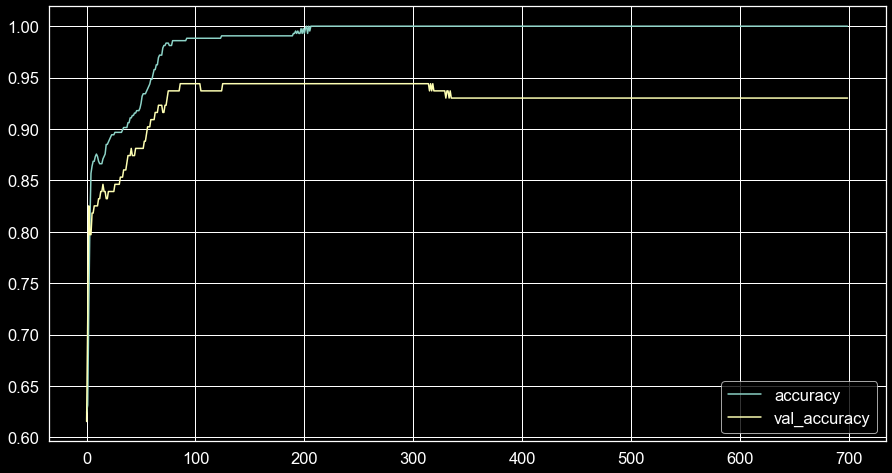

In [156]:
pd.DataFrame(hist)[['accuracy','val_accuracy']].plot()

In [157]:
pred = model.predict(X_test)

In [158]:
final = pd.DataFrame(pred, columns=['logit'])

In [159]:
final['binary']=final['logit'].apply(lambda x:1 if x>=0.50 else 0)

In [160]:
from sklearn.metrics import classification_report, confusion_matrix

In [161]:
print(classification_report(y_test,final['binary'].values))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        88
           1       0.91      0.91      0.91        55

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



<AxesSubplot:>

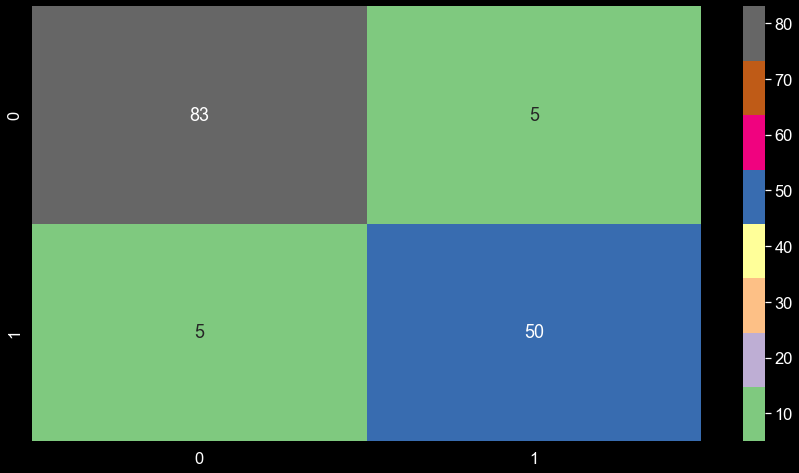

In [162]:
cm=confusion_matrix(y_test,final.binary)
sns.heatmap(cm,annot=True,cmap='Accent')

In [163]:
print(datetime.now() - a)

0:00:23.611274
